In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
import math
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("Concrete_Data_fix.csv")

# normalize
for i in ["Cement", "Slag", "Fly_Ash", "Water", "Superplastic", "Coarse_Aggr", "Fine_Aggr", "Age", "CCStr"]:
    df[i]=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))*100

# seperate to X and y
X=df.drop(["CCStr"],axis=1)
y=df["CCStr"]

df

,Cement,Slag,Fly_Ash,Water,Superplastic,Coarse_Aggr,Fine_Aggr,Age,CCStr
0,100.000000,0.0,0.0,32.108626,7.763975,69.476744,20.572002,25.0,96.748474
1,100.000000,0.0,0.0,32.108626,7.763975,73.837209,20.572002,25.0,74.199576
2,52.625571,50.0,0.0,84.824281,0.000000,38.081395,0.000000,100.0,47.265479
3,52.625571,50.0,0.0,84.824281,0.000000,38.081395,0.000000,100.0,48.237199
4,22.054795,50.0,0.0,56.070288,0.000000,51.569767,58.078274,100.0,52.286035
...,...,...,...,...,...,...,...,...,...
1025,39.817352,25.0,25.0,46.166134,27.639752,20.087209,43.728048,25.0,52.261119
1026,50.273973,0.0,50.0,59.265176,32.298137,4.912791,55.042649,25.0,35.941198
1027,10.616438,50.0,50.0,56.629393,18.944099,26.569767,46.663322,25.0,26.622649
1028,13.036530,75.0,0.0,42.971246,35.093168,54.825581,48.896136,25.0,37.922013


In [3]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fitting models on Training data 
    lr.fit(X_train, y_train) 
    lasso.fit(X_train, y_train) 
    ridge.fit(X_train, y_train) 
    enet.fit(X_train, y_train) 

    # training and testing with different models and different categorical feature handling methods
    y_pred_lr = lr.predict(X_test) 
    y_pred_lasso = lasso.predict(X_test) 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_enet = enet.predict(X_test)

    list1.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    list2.append(r2_score(y_test, y_pred_lr))
    list3.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    list4.append(r2_score(y_test, y_pred_lasso))
    list5.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    list6.append(r2_score(y_test, y_pred_ridge))
    list7.append(np.sqrt(mean_squared_error(y_test, y_pred_enet)))
    list8.append(r2_score(y_test, y_pred_enet))
    
# print("Model\t\t   RMSE \t  R2") 
# print("Linear Regression  {:.4f} \t{:.4f}".format(list1[2], list2[2])) 
# print("Lasso Regression   {:.4f} \t{:.4f}".format(list3[2], list4[2]))
# print("Ridge Regression   {:.4f} \t{:.4f}".format(list5[2], list6[2]))
# print("Enet Regression    {:.4f} \t{:.4f}".format(list7[2], list8[2]))
print("Finish!!")

Finish!!


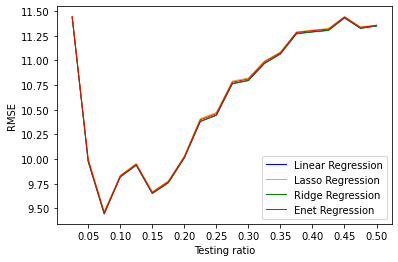

In [4]:
plt.plot(ratio, list1, lw=1, c='blue', label='Linear Regression')  # plot y1
plt.plot(ratio, list3, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list5, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list7, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('RMSE')  # y軸名字
plt.legend()
plt.show()

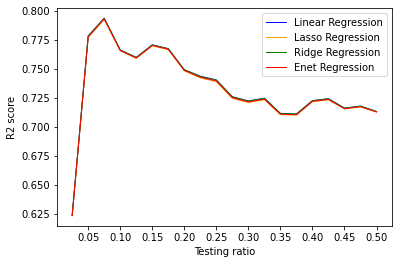

In [5]:
plt.plot(ratio, list2, lw=1, c='blue', ms=4, label='Linear Regression')  # plot y1
plt.plot(ratio, list4, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list6, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list8, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('R2 score')  # y軸名字
plt.legend()
plt.show()

In [6]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
enet.fit(X_train, y_train) 

# training and testing with different models and different categorical feature handling methods
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)
y_pred_enet = enet.predict(X_test)
    
print("Model\t\t    RMSE \t  R2") 
print("Linear Regression  {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("Lasso Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)))
print("Ridge Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))
print("Enet Regression    {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_enet)), r2_score(y_test, y_pred_enet)))

Model		    RMSE 	  R2
Linear Regression  9.6520	0.7708
Lasso Regression   9.6683	0.7700
Ridge Regression   9.6520	0.7708
Enet Regression    9.6619	0.7703


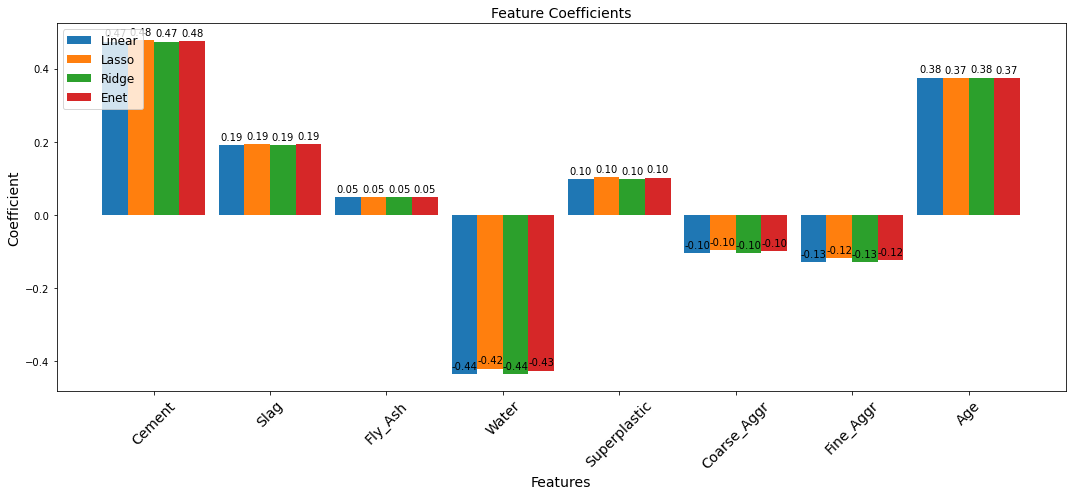

In [7]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
coeff_enet = enet.coef_

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.22
fig, ax = plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - 3*(width/2), coeff_lr, width, label='Linear') 
rects2 = ax.bar(x - 1*(width/2), coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 1*(width/2), coeff_ridge, width, label='Ridge') 
rects4 = ax.bar(x + 3*(width/2), coeff_enet, width, label='Enet') 
ax.set_ylabel('Coefficient', fontsize = 14) 
ax.set_xlabel('Features', fontsize = 14) 
ax.set_title('Feature Coefficients', fontsize = 14) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 14) 
ax.legend(loc=2, fontsize = 12) 
def autolabel(rects): 
    """Attach a text label above each bar in *rects*, displaying its height.""" 
    for rect in rects: 
        height = rect.get_height() 
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3)
autolabel(rects4)
fig.tight_layout() 
plt.show()

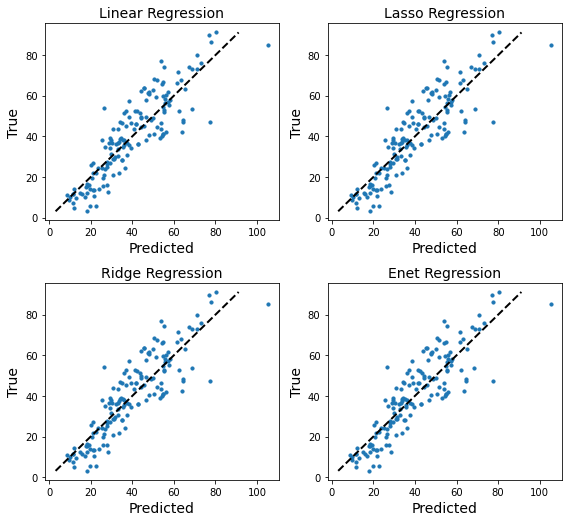

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Linear Regression", fontsize = 14) 

ax2.scatter(y_pred_lasso, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("Lasso Regression", fontsize = 14) 

ax3.scatter(y_pred_ridge, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("Ridge Regression", fontsize = 14) 

ax4.scatter(y_pred_enet, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Enet Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])